# Import dependencies

### Import relevant dependencies 

In [1]:
# Imports the MNIST dataset from Keras, a classic collection of 70,000 grayscale images of handwritten digits (0-9).
from keras.datasets import mnist 

# Imports TensorFlow, the core open-source library from Google for building and training machine learning models. We use the alias 'tf' by convention.
import tensorflow as tf

from tensorflow import TensorShape 

from visualkeras import SpacingDummyLayer # Added for better text spacing

# Imports the Adam optimiser. An optimiser is an algorithm that adjusts the model's internal parameters (weights) to minimise the error, and Adam is a popular, efficient choice.
from tensorflow.keras.optimizers import Adam, SGD

# Imports specific performance metrics. Metrics are used to evaluate how well the model is performing.
# Precision: Measures the accuracy of positive predictions.
# Recall: Measures the model's ability to find all the actual positive instances.
# Accuracy: Measures the overall fraction of correct predictions.
from tensorflow.keras.metrics import Precision, Recall, Accuracy

# Imports the History callback object. A 'callback' is a function that can be executed at different stages of training. The History object automatically records the metrics and loss values from each epoch.
from tensorflow.python.keras.callbacks import History

# Imports the ModelCheckpoint callback. This callback saves the model to a file during training, typically only when its performance on a validation metric improves.
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

from tensorflow.keras.utils import plot_model

# Imports the Pandas library, a powerful tool for data manipulation and analysis. It's mainly used for working with structured data in tables called DataFrames. 'pd' is the standard alias.
import pandas as pd

# Imports the Sequential model type from Keras. This is the simplest way to build a model, by creating a linear stack of layers.
from keras.models import Sequential, Model

# Imports different types of layers, which are the fundamental building blocks of a neural network.
# Dense: A standard, fully-connected layer where each neuron is connected to every neuron in the previous layer.
# Input: A special layer used to define the shape and data type of the model's input.
# Flatten: A layer that transforms a multi-dimensional input (like a 2D image) into a one-dimensional vector.
# Normalization: A preprocessing layer that scales input data to a standard range (e.g., mean of 0, standard deviation of 1), which helps the model train faster. 
from tensorflow.keras.layers import Dense, Input, Flatten, Normalization, Input, Conv2D, MaxPooling2D, Dropout

# Imports a utility function from scikit-learn, a popular library for traditional machine learning. train_test_split is used to split a single dataset into separate training and testing sets.
from sklearn.model_selection import train_test_split

# Imports the pyplot interface from Matplotlib, which is the most widely used library for creating plots and visualisations in Python. 'plt' is the standard alias.
import matplotlib.pyplot as plt

# Imports the NumPy library, which is the foundation for numerical computing in Python. It provides support for large, multi-dimensional arrays and a wide range of mathematical functions. 'np' is the standard alias.
import numpy as np

# Imports a data scaling tool from scikit-learn. MinMaxScaler scales all data features to a specific range, usually 0 to 1.
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

# Imports tools for 'type hinting' from Python's typing module. Type hints make code more readable and can be used by external tools to check for errors.
# Tuple: Used to hint that a variable or function return is a tuple (an ordered, immutable collection of elements).
from typing import Tuple

# Imports a specific type hint from NumPy's typing module.
# NDArray: Used to hint that a variable is a NumPy n-dimensional array, which is more descriptive than a generic type.
from numpy.typing import NDArray

# Imports the 'os' module. This library provides a way for Python to interact with the computer's underlying operating system.
# We use it for tasks like reading file names from a folder (os.listdir()) and constructing file paths that work correctly on any system, like Windows, Mac, or Linux (os.path.join()).
import os 

# Imports the 're' module, which stands for Regular Expression. This is Python's library for advanced pattern matching in strings.
# We use it to find and extract specific pieces of text from a string, like pulling the accuracy score out of a complex filename (e.g., finding '0.9935' in 'model_acc-0.9935.keras').
import re

# The seaborn dependency is used for plotting confusion matrices. 
import seaborn as sns

# Wandb allows us to log the results of our experiments online at the WandB platform. This platform can be used to visualise plots of our models'
# performance (accuracy, loss) per model, or for all models at once. Additionally, this platform keeps track of the models' architecture and hyperparameters used in the trainig process. 
import wandb

# This import allows us to log the metrics generated by our models (Keras)
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

import datetime

import visualkeras

import warnings

from collections import defaultdict

from PIL import ImageFont

from IPython.display import display # Needed to show plots inside a function

import requests

# Import the dataset

### Define the training set features (X_train) and target variable (Y_train) as well as the test set features (X_test_) and target variable (Y_test)

New shape for X_train for CNN's: (60000, 28, 28, 1)
New shape for X_test for CNN's: (10000, 28, 28, 1)
Shape of X_train:	 (60000, 28, 28, 1)
Shape of X_test:	 (10000, 28, 28, 1)
Shape of Y_train:	 (60000,)
Shape of Y_test:	 (10000,)
X_train data type: float32
X_test data type: float32
Y_train data type: uint8
Y_test data type: uint8

X_train data 567-th element (a 28x28 pixel image):
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0

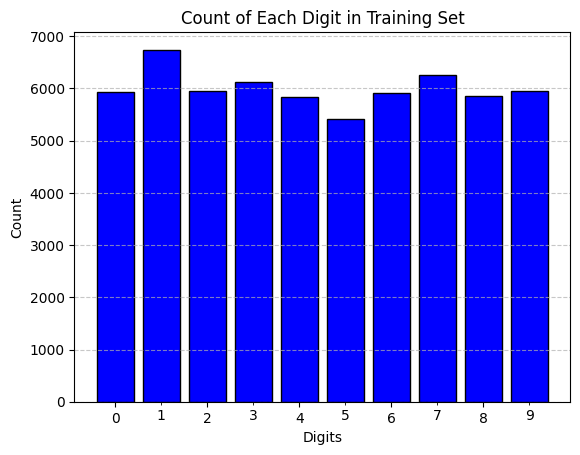

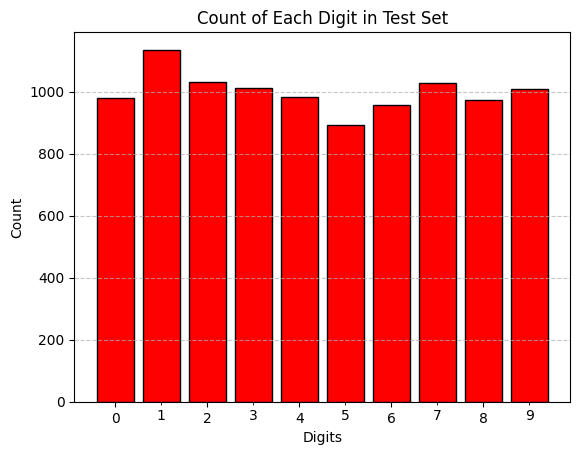

In [2]:
# Load the MNIST dataset, which is a large database of handwritten digits.
# The function returns two tuples: one for training data and one for testing data.
# Recalling, a Tuple is a collection of objects that are ordered and immutable.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# First we convert the data to float32, which helps with numerical stability. A float32 provides sufficient precision, while also being memory efficient.
# Most modern CPU's and GPU's are optimized for float32 operations, making computations faster.
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Then we convert the training data to have a channel dimension, which is required for CNNs.
X_train = X_train[..., tf.newaxis] # Add the channel dimension
X_test = X_test[..., tf.newaxis] # Add the channel dimension
print(f"New shape for X_train for CNN's: {X_train.shape}")
print(f"New shape for X_test for CNN's: {X_test.shape}")

# Declare the types of the loaded data for clarity.
X_train: NDArray[np.float32]
Y_train: NDArray[np.uint8]
X_test: NDArray[np.float32]
Y_test: NDArray[np.uint8]

# We set the line width to a large value to avoid line breaks when printing the array.
with np.printoptions(linewidth=10000):
    # Print the shapes of the datasets to understand their dimensions.
    print("Shape of X_train:\t", X_train.shape)
    print("Shape of X_test:\t", X_test.shape)
    print("Shape of Y_train:\t", Y_train.shape)
    print("Shape of Y_test:\t", Y_test.shape)
    print(f"X_train data type: {X_train.dtype}")
    print(f"X_test data type: {X_test.dtype}")
    print(f"Y_train data type: {Y_train.dtype}")
    print(f"Y_test data type: {Y_test.dtype}")

    # Inspect a single data sample to see what it looks like.
    n: int = 567
    print(f"\nX_train data {n}-th element (a 28x28 pixel image):\n", np.squeeze(X_train[n]))
    print("\nAnd its corresponding label:\t", Y_train[n])

    # TODO: For using this data in a neural network,
    # Tensorflow/Keras expects the input data to be in a 1D or 2D array format where each row represents a single sample and each column represents a feature. The general format for the input shape is: (batch_size, feature_1, feature_2, ...)
    # However, we can use the tf.keras.layers.Flatten layer as the first layer in our sequential model.
    # This layer automatically flattens the input shape without the need for manual reshaping of our data.
    # For a Dense (fully connected) network: We must flatten each 28x28 image into a single 1D array of 784 pixels. The input shape for the first layer of our model would then be (None, 784), where None represents a variable batch size.
    # For a Convolutional Neural Network (CNN): We must add a channel dimension. Since the images are grayscale, there is only one channel. We would reshape the data to (number_of_images, 28, 28, 1). The input shape for the first layer (typically a Conv2D layer) would be (28, 28, 1). The batch size is handled automatically by Keras.
    # Scaling can also be performd in the model using a tf.keras.layers.Rescaling or keras.layers.Normalization layer as the first layer in our sequential model.
    # The advantage of using these layers is that they integrate seamlessly into the model architecture, ensuring that the data is preprocessed consistently during both training and inference.
    # This approach also simplifies the code by reducing the need for separate preprocessing steps outside the model definition.
    # And, it ensures that inference data is processed in the same way as training data, which is crucial for maintaining model performance.

    # Analyze the distribution of the digits in the training set.
    # `np.unique` finds the unique digit labels and `return_counts=True` counts their occurrences.
    dataset_train_distribution: Tuple[np.ndarray, np.ndarray] = np.unique(Y_train, return_counts=True)
    digits_train: np.ndarray = dataset_train_distribution[0]
    counts_train: np.ndarray = dataset_train_distribution[1]
    
    print("\n--- Train Dataset Distribution ---")
    print("Digits:\t\t\t", digits_train)
    print("Count per digit:\t", counts_train)
    
    # Calculate basic statistics on the distribution.
    avg: float = np.mean(counts_train)
    print(f"Average sample size:\t {avg:.2f}")
    
    max_count_train: np.int64 = np.max(counts_train)
    min_count_train: np.int64 = np.min(counts_train)
    print(f"Maximum sample size:\t {max_count_train}")
    print(f"Minimum sample size:\t {min_count_train}")


    dataset_test_distribution: Tuple[np.ndarray, np.ndarray] = np.unique(Y_test, return_counts=True)
    digits_test: np.ndarray = dataset_test_distribution[0]
    counts_test: np.ndarray = dataset_test_distribution[1]
    
    print("\n--- Test Dataset Distribution ---")
    print("Digits:\t\t\t", digits_test)
    print("Count per digit:\t", counts_test)
    
    # Calculate basic statistics on the distribution.
    avg: float = np.mean(counts_test)
    print(f"Average sample size:\t {avg:.2f}")
    
    max_count_test: np.int64 = np.max(counts_test)
    min_count_test: np.int64 = np.min(counts_test)
    print(f"Maximum sample size:\t {max_count_test}")
    print(f"Minimum sample size:\t {min_count_test}")

# Create a bar chart from the counts and digits to visualize the distribution.
plt.bar(digits_train, counts_train, color='blue', edgecolor='black')

# Set the title and labels for clarity.
plt.title('Count of Each Digit in Training Set')
plt.xlabel('Digits')
plt.ylabel('Count')

# Set x-ticks to be at the center of each bar and label them with the digit.
# Minor ticks are used here to place the labels directly under the bars.
# Ticks specify the positions on the x-axis where the labels should be placed.
# By setting ticks=digits_train, we ensure that each digit (0-9) is labeled correctly under its corresponding bar.
plt.xticks(ticks=digits_train, minor=True, labels=digits_train)

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

# And the same bar chart for the test set.

# Create a bar chart from the counts and digits to visualize the distribution.
plt.bar(digits_test, counts_test, color='red', edgecolor='black')

# Set the title and labels for clarity.
plt.title('Count of Each Digit in Test Set')
plt.xlabel('Digits')
plt.ylabel('Count')

# Set x-ticks to be at the center of each bar and label them with the digit.
plt.xticks(ticks=digits_test, minor=True, labels=digits_test)

# Add a grid for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

## Dataset Analysis

The content and size of the training and testing datasets align with the description on the Kaggle MNIST dataset page, Hojjat, F. (2017). MNIST: The Most Famous Dataset in the World. Kaggle. Retrieved August 28, 2025, from https://www.kaggle.com/datasets/hojjatk/mnist-dataset. The plot of digit distribution shows a fairly homogeneous representation across all classes (digits 0 through 9). While the digit '1' is slightly oversampled and the digit '5' is slightly undersampled, the class imbalance is not significant enough to warrant further action for this assessment.

In a scenario where the distribution were to be significantly imbalanced and we needed to make it more homogeneous, we would use a technique called **resampling**. Resampling involves adjusting the distribution of the training data to be more balanced. There are two primary types:

- **Oversampling** involves duplicating samples from the underrepresented classes to increase their frequency.

- **Undersampling** involves removing samples from the overrepresented classes to reduce their frequency.

## Part 1, Task 1: Creating a simple Multilayer Perceptron (MLP) neural network

The code below defines our base model.

To experiment with different architectures or tune its hyperparameters, we simply copy this entire cell and make our changes.

We need to make sure to give each new model a unique name. This ensures that when the ModelCheckpoint callback saves the best-performing version during training, the filename will be clear and identifiable.

In [3]:
# --- Set Seeds for Reproducibility ---

# This sets the global random seed for all TensorFlow operations.
# It ensures that things like model weight initialisation are the same every time.
# `tf.random.set_seed()` is the modern way to do this in TensorFlow 2.
tf.random.set_seed(1)

# This sets the random seed for all NumPy operations.
# This is important if we are creating our data using NumPy or using any
# NumPy functions that involve randomness.
np.random.seed(23)

In [4]:
# **Task 1**

# Build a neural network without convolutional layers to do the classification task (hint: you will need the use of dense layers). 
# Then you can change the model structure (i.e. number of dense layers, number of neurons in dense layers or activation functions) to be able to improve network performance.

def create_mlp_model_base() -> Sequential:
    """
    Defines and returns the (base) MLP model architecture.
    """
    # Note: we can change the model architecture here. However, it is more prudent to save the model parameters first, and then change it. 
    model = Sequential([
        # We use the implicit input_shape here for a cleaner look.
        Input(shape=(28, 28, 1)),
        Normalization(),
        Flatten(),
        Dense(units=32, activation='relu'), # Relu is the goto activation function. We could also use LeakyRelu, tanh, sigmoid, etc.
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name = "Base_MLP_Model")
    return model

In [5]:
def create_mlp_model_2() -> Sequential:
    """
    Defines and returns the (base) MLP model architecture.
    """
    model = Sequential([
        # We use the implicit input_shape here for a cleaner look.
        Input(shape=(28, 28, 1)),
        Normalization(),
        Flatten(),
        Dense(units=64, activation='relu'), # Relu is the goto activation function. We could also use LeakyRelu, tanh, sigmoid, etc.
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name = "Base_MLP_Model_2")
    return model

In [6]:
# This is our first "base" model we created. Repeated here, because it yielded very good accuracies on both validate and test data, as well as loss. 
def create_mlp_model_3() -> Sequential:
    """
    Defines and returns the (base) MLP model architecture.
    """
    model = Sequential([
        # We use the implicit input_shape here for a cleaner look.
        Input(shape=(28, 28, 1)),
        Normalization(),
        Flatten(),
        Dense(units=128, activation='relu'), # Relu is the goto activation function. We could also use LeakyRelu, 
        Dense(units=256, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name = "Base_MLP_Model_3")
    return model

In [7]:
def create_mlp_model_wide() -> Sequential:
    """
    Defines and returns the (base) MLP model architecture.
    """
    # Note: we can change the model architecture here. However, it is more prudent to save the model parameters first, and then change it. 
    model = Sequential([
        # We use the implicit input_shape here for a cleaner look.
        Input(shape=(28, 28, 1)),
        Normalization(),
        Flatten(),
        Dense(units=512, activation='relu'),
        Dense(units=1024, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name = "Wide_MLP_Model")
    return model

In [8]:
def create_mlp_model_deep() -> Sequential:
    """
    Defines and returns the (base) MLP model architecture.
    """
    # Note: we can change the model architecture here. However, it is more prudent to save the model parameters first, and then change it. 
    model = Sequential([
        # We use the implicit input_shape here for a cleaner look.
        Input(shape=(28, 28, 1)),
        Normalization(),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name="Deep_MLP_Model")
    return model

In [9]:
# All MLP models:
mlp_model_functions = [
create_mlp_model_base,
create_mlp_model_2,
create_mlp_model_3,
create_mlp_model_wide,
create_mlp_model_deep,
]

# # Only a single model:
# mlp_model_functions = [
# create_mlp_model_3,
# ]


### Define the training loop

This training loop will be called for both the MLP as well as the CNN models. This function is convenient, as it only needs to be defined once, and we can pass in different models, hyperparameter sets, and train data to our liking. 

In [10]:
def run_experiment(model_creation_func, hyperparameters, parent_folder, X_train, Y_train):
    """
    Runs a full training experiment for a given model architecture and hyperparameter set.
    """
    # Create the model instance first.
    model = model_creation_func()

    # Set default hyperparameters in case they are not provided in the hyperparameters dictionary.
    default_lr = 0.001
    default_optimiser = 'adam'
    default_batch_size = 64
    default_epochs = 10
    if model.name is None or model.name == "":
        model.name = model_creation_func.__name__

    # --- Adapt the Normalisation Layer ---
    print("\nAdapting the normalisation layer...")
    # The adapt method is now called here, before the model is compiled or trained.
    model.layers[0].adapt(X_train)
    print("Adaptation complete.\n")

    print(f"\n--- Starting Experiment: {model.name} ---")

    # We can print a summary of the model's architecture to see the layers and parameter counts.
    print("\n--- Model Architecture ---")
    model.summary()
    # Generate the model's diagram as an image file
    # plot_model(model, to_file=f'{model.name}_architecture.png', show_shapes=True, show_layer_names=True)

    # And we can also print the hyperparameters of the model.
    print("\n--- Hyperparameters ---")
    for key, value in hyperparameters.items():
        print(f"{key:<20}: {value}")

    # --- Initialise WandB Run and Callbacks ---
    # The callbacks and WandB run are configured AFTER the model is fully built and adapted.
    # This is important because the WandBMetricsLogger callback inspects the model to log its architecture and parameters.
    # The run_name includes the model name, learning rate, batch size, and a timestamp for uniqueness.
    run_name = f"{model.name}-lr_{hyperparameters.get('learning_rate', default_lr)}-bs_{hyperparameters.get('batch_size', default_batch_size)}-{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    # local_log_dir = os.path.join(os.getcwd(), "wandb", run_name)
    local_log_dir = os.path.join(os.getcwd(), "wandb")
    os.makedirs(local_log_dir, exist_ok=True)

    run = wandb.init(
        project="CSE5ML-Assessment2",
        name=run_name,
        config=hyperparameters,
        dir=local_log_dir,
    )

    log_dir = os.path.join(parent_folder, "logs", model.name, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    wandb_metrics_logger = WandbMetricsLogger()

    # --- Configure the Optimiser ---
    optimiser_name = hyperparameters.get('optimiser', default_optimiser).lower() # Default to 'adam' if not specified
    learning_rate = hyperparameters.get('learning_rate', default_lr) # Default to 0.001 if not specified

    if optimiser_name == 'adam':
        optimiser = Adam(learning_rate=learning_rate) # We use the Adam Object rather than the string 'adam' to be explicit. The difference is that we can see the learning rate in the model summary.
    elif optimiser_name == 'sgd':
        optimiser = SGD(learning_rate=learning_rate)
    else:
        optimiser = optimiser_name

    # --- Configure the ModelCheckpoint Callback ---
    model_specific_folder = os.path.join(parent_folder, model.name) # This creates a sub-folder for each model type under the parent folder.
    os.makedirs(model_specific_folder, exist_ok=True) # exist_ok=True avoids an error if the folder already exists.
    filepath = os.path.join(model_specific_folder, 'best_model_epoch-{epoch:02d}_val_acc-{val_accuracy:.4f}.keras') #The filepath now includes the model name, the best epoch and validation accuracy as a sub-folder.
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1 # Only print messages when the model improves
    )

    # Configure the EarlyStopping callback
    # - monitor='val_loss': Watch the validation loss.
    # - patience=3: Stop training if val_loss doesn't improve for 3 consecutive epochs.
    # - restore_best_weights=True: Restore model weights from the epoch with the best val_loss.
    early_stopping = EarlyStopping(
        monitor='val_accuracy', # we track the loss, because this tells us: how certain the model is about its predictions, rather than just saying whether it was right or wrong. E.g.: 51% confindence the digit is a 2. So accuracy = 100% - but it's not very sure.
        patience=10, # We use a patience of 10 epochs to allow the model more time to improve, especially with a lower learning rate.
        restore_best_weights=True
    )

    # --- Compile the Model ---
    model.compile(
        optimizer=optimiser,
        loss=hyperparameters.get('loss_function', 'sparse_categorical_crossentropy'),
        metrics=['accuracy'] # For multi-class classification, 'accuracy' is appropriate. However, we could also add Precision() and Recall() here if needed.
    )

    # --- Train the Model ---
    # history is a History object that contains details about the training process, including the loss and accuracy for each epoch.
    history = model.fit(
        X_train,
        Y_train,
        epochs=hyperparameters.get('epochs', default_epochs),
        batch_size=hyperparameters.get('batch_size', default_batch_size),
        validation_split=0.1, # Setting the validation set to 10% of the training set. 
        callbacks=[checkpoint, wandb_metrics_logger, tensorboard_callback, early_stopping],
        verbose=1
    )
    # Attach the hyperparameter dictionary to the history object itself, so it is directly related to the history.
    history.hyperparameters = hyperparameters

    # The history.history dictionary contains a list of validation accuracies for each epoch.
    val_accuracies = history.history['val_accuracy']
    best_validation_accuracy = max(val_accuracies)
    best_epoch = val_accuracies.index(best_validation_accuracy) + 1
    associated_train_acc = history.history['accuracy'][best_epoch - 1]

    print("\n--- Peak Performance Summary ---")
    print(f"{'Best validation accuracy:':<35} {best_validation_accuracy:.4f}")
    print(f"{'Associated training accuracy:':<35} {associated_train_acc:.4f}")
    print(f"{'Occurred at epoch:':<35} {best_epoch}")

    return history

### Define sets of hyperparameters

The cell below allow us to set a plethora of hyperparameters, such as the learning rate, batch_size, but also the optimiser and the number of epochs the training loop is run for. 

In [11]:
# --- Define Hyperparameter Sets ---
# Part 1 Task 3 only requires one experiment with an MLP, so we will just define one hyperparameter set for the MLP here.
mlp_epochs = 100
mlp_batch_size = 64
# Experiment 1: Our baseline run
# We choose SGD as our optimiser because it is expected that the loss landscape of our simple MLP model is largely convex. 
mlp_exp_1_config = {
    "optimiser": "SGD",
    "learning_rate": 0.001, # The optimal, or at least a satisfactory LR will have to be identified by experimenting. We start with LR = 0.01. This does not lead to convergence of Loss and Accuracy. So LR=0.001 is used. 
    "epochs": mlp_epochs,
    "batch_size": mlp_batch_size
}



# # Experiment 2: Same as the MLP_Baseline but with a lower learning rate
# mlp_exp_2_config = {
#     "optimiser": "Adam",
#     "learning_rate": 0.001,
#     "epochs": mlp_epochs,
#     "batch_size": mlp_batch_size,
# }

# # Experiment 3: Same as the MLP_Baseline but with a different optimizer (SGD)
# mlp_exp_3_config = {
#     "optimiser": "SGD",
#     "learning_rate": 0.01,
#     "epochs": mlp_epochs,
#     "batch_size": mlp_batch_size,
# }

# # Experiment 4: Same as the MLP_Baseline but with a different optimizer (SGD) and a lower learning rate
# mlp_exp_4_config = {
#     "optimiser": "SGD",
#     "learning_rate": 0.001,
#     "epochs": mlp_epochs,
#     "batch_size": mlp_batch_size,
# }

In [12]:
# --- Run the full list of models ---
run_mlp_experiments = False

if run_mlp_experiments:
    mlp_histories = []
    for mlp_model_function in mlp_model_functions:
        mlp_history = run_experiment(
            model_creation_func=mlp_model_function, 
            # But use only one set of hyperparameters for now.
            hyperparameters=mlp_exp_1_config, 
            parent_folder='MLP_Models',
            X_train=X_train,
            Y_train=Y_train,
        )
        mlp_histories.append(mlp_history)

# # --- To run the second experiment, we just call it again with a different config (hyper parameter set) :-)
# --- We first  test different model architectures before running more experiments with different hyperparameters (Part 1 Task 1 & 2). ---
# --- THen we test the best performing model of Part 1 Task 1& 2 with different hyperparameters. ---

# Notes on Sparse Categorical Loss vs. Categorical Loss
# Understanding Cross-Entropy Loss

At its heart, **cross-entropy** is a concept from information theory that measures how different two probability distributions are. In the context of training a neural network for classification, we use it to measure the "distance" between the model's predicted probability distribution and the true probability distribution of the labels. The goal of training is to minimise this distance, effectively making the model's predictions more accurate (Goodfellow et al., 2016).

---
### Categorical Cross-Entropy (for One-Hot Labels)

You use this loss function when your labels are explicitly **one-hot encoded** (e.g., the digit `3` is represented as `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`). The formula for a single sample is:

$$L = -\sum_{i=0}^{C-1} y_i \log(\hat{y}_i)$$

-   $L$ is the final loss value for the sample.
-   $C$ is the total number of classes (e.g., 10 for MNIST).
-   $y_i$ is the ground truth (it is `1` for the correct class and `0` for all others).
-   $\hat{y}_i$ is the model's predicted probability for class $i$.

Because the `y` vector is almost all zeros, the summation simplifies to just the negative logarithm of the probability the model assigned to the single correct class. For a label of `3`, the loss simply becomes $L = -\log(\hat{y}_3)$.

---
### Sparse Categorical Cross-Entropy (for Integer Labels)

This is a more computationally and memory-efficient version used when your labels are simple **integers** (e.g., `3`). It arrives at the exact same mathematical result but skips the need for the one-hot encoded vector.

The formula is a direct implementation of the simplified logic:

$$L = -\log(\hat{y}_c)$$

-   $L$ is the final loss value for the sample.
-   $c$ is the integer representing the correct class (e.g., `c = 3`).
-   $\hat{y}_c$ is the model's predicted probability for that correct class $c$.

As Chollet (2021) explains, both formulas compute the exact same value. The choice is purely a practical one based on the format of your labels, not a mathematical one that affects the model's learning.

---
**References**

Chollet, F. (2021). *Deep learning with Python* (2nd ed.). Shelter Island, NY: Manning Publications.

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep learning*. Cambridge, MA: MIT Press.

## Part 1, Task 2: Creating a simple Convolutional Neural Network (CNN)

The code below defines our base model.

To experiment with different architectures or tune its hyperparameters, we simply copy this entire cell and make our changes.

We need to make sure to give each new model a unique name. This ensures that when the ModelCheckpoint callback saves the best-performing version during training, the filename will be clear and identifiable.

In [13]:
# **Task 2**

# Build a neural network with the use of convolutional layers (you can decide other layer types you want to include in your network). 
# Then you can change the number of convolutional layers and the number of filters or activation functions in the convolutional layers to be able to improve network performance.

def create_cnn_model_base() -> Sequential:
    """
    Defines the base CNN model architecture with Dropout for regularization.
    """
    model = Sequential([
        # Preprocessing layers
        Input(shape=(28, 28, 1)),
        Normalization(),
        
        # --- Convolutional Block 1 ---
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        SpacingDummyLayer(spacing=15),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Convolutional Block 2 ---
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # --- Classification Head ---
        Flatten(),
        # Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name="Base_CNN")
    return model    

In [14]:
# Create a second CNN base model with the same architecture, but a dropout in the classification head.
def create_cnn_model_base_dropout() -> Sequential:
    """
    Defines and returns the base CNN model architecture with dropout in the classification head.
    """
    model = Sequential([
        # Preprocessing layers
        Input(shape=(28, 28, 1)),
        Normalization(),
            
        # --- Convolutional Block 1 ---
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Convolutional Block 2 ---
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # --- Classification Head ---
        Flatten(),
        Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name="CNN_with_Dropout")
    return model

In [15]:
# Create a wide CNN 
def create_cnn_model_wide() -> Sequential:
    """
    Defines and returns a wide CNN model architecture.
    """
    model = Sequential([
        # Preprocessing layers
        Input(shape=(28, 28, 1)),
        Normalization(),
        
        # --- Convolutional Block 1 ---
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Convolutional Block 2 ---
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # --- Classification Head ---
        Flatten(),
        Dropout(0.5),
        Dense(units=256, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name="Wide_CNN_Model")
    return model

In [16]:
def create_cnn_model_deep() -> Sequential:
    """
    Defines and returns a deep CNN model architecture with padding to preserve dimensions.
    """
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Normalization(),
        
        # --- Convolutional Block 1 ---
        # Add padding='same' to all Conv2D layers, so we preserve the spatial dimensions. If we don't do this, the image shrinks too quickly.
        # and no meaningful features can be extracted.
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)), # This is where the shrinking now happens (28x28 -> 14x14)

        # --- Convolutional Block 2 ---
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)), # Second shrink (14x14 -> 7x7)
        
        # --- Classification Head ---
        # The input to Flatten is now a healthy 7x7x64=3,136 full of rich features.
        Flatten(),
        Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ], name="Deep_CNN_Model_Padded")
    return model

In [17]:
cnn_model_functions = [
create_cnn_model_base,
create_cnn_model_base_dropout,
create_cnn_model_wide,
# create_cnn_model_deep, # We teain the deep network separately with a much lower LR. We have observed that this model performs no better than a random guess (i.e. 10% val. accuracy)
# Almost certainly this has to do with the LR, the model can't get to the valleys of the loss landscape, as it overshoots. 
# Future to do: Find a way to reduce the loss landscape to 3D, or 2D dimension, and show the parth the Optimiser takes, to be able to demonstrate the effect of the LR. 
]


# cnn_model_functions = [
# create_cnn_model_deep,
# ]

# Plotting all model architectures

In [18]:
# def text_callable(layer_index, layer):
#     above = bool(layer_index % 2)

#     # --- MORE ROBUST SHAPE HANDLING ---
#     # Try to get the shape from the more modern '.output.shape' attribute
#     try:
#         shape = layer.output.shape
#     except AttributeError:
#         # Fallback to '.output_shape' for layers like Input
#         try:
#             shape = layer.output_shape

#         except AttributeError:
#             # If all else fails, we can't determine the shape
#             return f"{layer.name}\n(Shape N/A)", above

#     # Handle nested lists of shapes (which can come from Input layers)
#     if isinstance(shape, list):
#         shape = shape[0]

#     # Convert TensorShape to list, otherwise, ensure it's a list
#     if isinstance(shape, TensorShape):
#         output_shape = shape.as_list()
#     else:
#         output_shape = list(shape)
    
#     # Remove the 'None' batch dimension for cleaner plotting
#     output_shape = [dim for dim in output_shape if dim is not None]
#     # --- END OF FIX ---

#     # Create a string representation of the output shape
#     output_shape_txt = ""
#     for ii, dim in enumerate(output_shape):
#         output_shape_txt += str(dim)
#         if ii < len(output_shape) - 2:
#             output_shape_txt += "x"
#         if ii == len(output_shape) - 2:
#             output_shape_txt += "\n"

#     output_shape_txt += f"\n{layer.name}"

#     return output_shape_txt, above


def text_callable(layer_index, layer):
    above = bool(layer_index % 2)
    try:
        shape = layer.output.shape
    except AttributeError:
        try:
            shape = layer.output_shape
        except AttributeError:
            return f"{layer.name}\n(Shape N/A)", above
    if isinstance(shape, list):
        shape = shape[0]
    if isinstance(shape, TensorShape):
        output_shape = shape.as_list()
    else:
        output_shape = list(shape)
    output_shape = [dim for dim in output_shape if dim is not None]
    output_shape_txt = ""
    for ii, dim in enumerate(output_shape):
        output_shape_txt += str(dim)
        if ii < len(output_shape) - 2:
            output_shape_txt += "x"
        if ii == len(output_shape) - 2:
            output_shape_txt += "\n"
    output_shape_txt += f"\n{layer.name}"
    return output_shape_txt, above

In [19]:
# def visualize_model(model: Model, style: str = 'layered'):
#     """
#     Generates and displays a visual architecture plot for a given Keras model.
#     """
#     print(f"--- Visualizing Architecture for: {model.name} (Style: {style}) ---")
    
#     color_map = defaultdict(lambda: {'fill': '#999999'})
#     color_map[Conv2D] = {'fill': '#00B8D4'}
#     color_map[MaxPooling2D] = {'fill': '#FFAB00'}
#     color_map[Dense] = {'fill': '#651FFF'}
#     color_map[Flatten] = {'fill': '#E91E63'}
#     color_map[Normalization] = {'fill': '#BDBDBD'}

#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore", UserWarning)
        
#         if style == 'layered':
#             # Generate the 3D-style block diagram using the text_callable function
#             display(visualkeras.layered_view(
#                 model,
#                 text_callable=text_callable, 
#                 color_map=color_map,
#                 scale_xy=12,
#                 scale_z=1.2,
#                 spacing=40
#             ))
#         elif style == 'graph':
#             # Generate the 2D flowchart diagram.
#             display(visualkeras.graph_view(
#                 model,
#                 color_map=color_map
#             ))
#         else:
#             print(f"Error: Unknown style '{style}'. Please choose 'layered' or 'graph'.")



def visualize_model(model: Model, style: str = 'layered'):
    """
    Generates and displays a visual architecture plot for a given Keras model.
    """
    print(f"--- Visualizing Architecture for: {model.name} (Style: {style}) ---")
    
    color_map = defaultdict(lambda: {'fill': '#999999'})
    color_map[Conv2D] = {'fill': '#00B8D4'}
    color_map[MaxPooling2D] = {'fill': '#FFAB00'}
    color_map[Dense] = {'fill': '#651FFF'}
    color_map[Flatten] = {'fill': '#E91E63'}
    color_map[Normalization] = {'fill': '#BDBDBD'}

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning)
        
        if style == 'layered':
            # --- CREATE A NEW MODEL WITH SPACING LAYERS FOR BETTER VISUALS ---
            # This prevents the text labels from overlapping on the plot.
            plot_model = Sequential()
            for layer in model.layers:
                plot_model.add(layer)
                if 'conv' in layer.name or 'pool' in layer.name or 'dense' in layer.name:
                     # Add a dummy layer after key layers for spacing
                    plot_model.add(SpacingDummyLayer(spacing=30))
            
            display(visualkeras.layered_view(
                plot_model, # Use the new model with spacing
                text_callable=text_callable,
                color_map=color_map,
                scale_xy=10,
                scale_z=1,
                spacing=0, # Spacing is now handled by our dummy layers
                padding=50 # Add padding to prevent text cutoff at the edges
            ))
        elif style == 'graph':
            display(visualkeras.graph_view(
                model,
                color_map=color_map
            ))
        else:
            print(f"Error: Unknown style '{style}'. Please choose 'layered' or 'graph'.")


In [21]:
# Now, loop through, create each model "on the fly", and plot it
for model_creation_function in cnn_model_functions:
    # 1. Create the model instance from the function
    model_instance = model_creation_function()
    
    # 2. Call the plotting function to visualize it
    # THE FIX IS HERE: We call our helper function, not the base library.
    visualize_model(model_instance, style='layered')
    # visualize_model(model_instance, style='graph')
    
    print("="*60 + "\n") # Add a separator for clarity

--- Visualizing Architecture for: Base_CNN (Style: layered) ---


AttributeError: The layer max_pooling2d_2 has never been called and thus has no defined output.

In [ ]:
# --- Define Hyperparameter Set for the Base CNN ---
cnn_epochs = 100
cnn_batch_size = 64
cnn_exp_1_config = {
    "optimiser": "Adam",
    "learning_rate": 0.01,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}
cnn_exp_2_config = {
    "optimiser": "Adam",
    "learning_rate": 0.001,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}

cnn_exp_3_config = {
    "optimiser": "SGD",
    "learning_rate": 0.01,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}

cnn_exp_4_config = {
    "optimiser": "SGD",
    "learning_rate": 0.001,
    "epochs": cnn_epochs,
    "batch_size": cnn_batch_size
}

cnn_config = [cnn_exp_2_config, cnn_exp_3_config, cnn_exp_4_config]
# cnn_exp_1_config,  We do not need to include the cnn_exp_1_config, because we have already run this on all models. 
# In the cell below, setting the all_exp_params is a flag that ensure that when set to True, all models are trained on all parameters (computationally intensive)

In [ ]:
run_cnn_experiments = False # A simple flag to control whether we run the CNN experiments or not. This is convenient because CNN experiments take longer to run.
# and when we restart the notebook, we might want to just run the MLP experiments first.
all_exp_params = True

# --- Run the full list of experiments ---
if run_cnn_experiments:
    cnn_histories = []
    for cnn_model_function in cnn_model_functions:
        if not all_exp_params:
            cnn_history = run_experiment(
                model_creation_func=cnn_model_function, 
                hyperparameters=cnn_exp_1_config,  # If we do not set the all experiment parameters to True, then we only need the 1 config file. 
                parent_folder='CNN_Models',
                X_train=X_train,
                Y_train=Y_train,
            )
        else:
            for config in cnn_config:
                cnn_history = run_experiment(
                    model_creation_func=cnn_model_function, 
                    hyperparameters=config, 
                    parent_folder='CNN_Models',
                    X_train=X_train,
                    Y_train=Y_train,
                )

        cnn_histories.append(cnn_history)

# # --- To run the second experiment, we just call it again with a different config (hyper parameter set) :-)
# --- We first  test different model architectures before running more experiments with different hyperparameters (Part 1 Task 1 & 2). ---
# --- THen we test the best performing model of Part 1 Task 1& 2 with different hyperparameters. ---

In [ ]:
# --- Define the Plotting Function ---

def plot_training_history(history: History):
    """
    Plots training history and automatically extracts hyperparameters 
    from the history object itself.
    """
    # --- Extract the hyperparameters that we attached ---
    # We can now access them directly from the history object!
    config = history.hyperparameters
    
    optimizer_name = config.get('optimiser', 'N/A')
    learning_rate = config.get('learning_rate', 'N/A')
    batch_size = config.get('batch_size', 'N/A')

    # --- Create the subtitle for the plots ---
    subtitle = f"Optimizer: {optimizer_name}, LR: {learning_rate}, Batch Size: {batch_size}"

    # --- Plotting Code (Same as before) ---
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'{history.model.name}\n{subtitle}') # Main title with subtitle

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for subtitle
    plt.show()

### Plot the results of every epoch

In [ ]:
# A simple wrapper function to print all histories in a list.
def print_training_histories(histories):
    print(f"The number of models to plot: {len(histories)}")
    for history in histories:
        print(f"Model number: {histories.index(history)+1}")
        plot_training_history(history)
        print("-"*100)

if run_mlp_experiments:
    print_training_histories(mlp_histories)
if run_cnn_experiments:
    print_training_histories(cnn_histories)


## Testing the models on the held-out test set
We test the model on the test data, which is data that the model has never seen before. Then we verify the model's real-world accuracy. It is expected that this does not deviate much from the validation sets, because the MNIST dataset contains images that are very clean and simple:
- They are small (28 x 28 pixels only).
- The digits are centered and normalised in size.
- The background is a solid colour with no distracting noise.
  
Because of this simplicity, the patterns that differentiate one digit from another (e.g., a "1" is a vertical line, an "8" is two loops) are very strong and easy for our model to learn.

First we define a function that browser to a folder with saved models, extracts the file with the highest validation accuracy in its name, loads it and tests it with the held-out X_test and Y_test. 

A function is convenient because we will use it on different models, with different hyperparameters and hence, avoid repetition. 

In [ ]:
def find_load_and_analyse_best_model(
    parent_folder: str, # Changed name for clarity
    x_test_data: NDArray[np.float32], 
    y_test_data: NDArray[np.int_]
) -> Tuple[tf.keras.Model | None, float | None, float | None]:
    """
    Recursively searches through all subfolders in a parent directory to find the
    single best Keras model, then loads and analyses it.
    """
    best_model_path = None # We will now store the full path directly
    best_val_accuracy = -1.0

    pattern = re.compile(r"val_acc-([\d.]+)\.keras")

    if not os.path.isdir(parent_folder):
        print(f"Error: Parent directory not found at '{parent_folder}'")
        return None, None, None

    # --- NEW: Use os.walk() to search through all subdirectories ---
    # os.walk() goes through a directory tree top-down.
    for dirpath, _, filenames in os.walk(parent_folder):
        for filename in filenames:
            match = pattern.search(filename)
            if match:
                val_accuracy = float(match.group(1))
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    # Construct and store the full path to this new best model
                    best_model_path = os.path.join(dirpath, filename)
    
    # The rest of the function works perfectly, we just need to use best_model_path
    if best_model_path:
        print(f"Found and loading best model across all experiments: {best_model_path}")
        
        loaded_model = tf.keras.models.load_model(best_model_path)
        
        # --- Print Compiled Hyperparameters ---
        print("\n--- Key Hyperparameters ---")
        # Gets the configuration of the model's optimiser.
        optimiser_config = loaded_model.optimizer.get_config()
        optimiser_name = optimiser_config['name']
        learning_rate = optimiser_config['learning_rate']
        
        # Gets the name of the loss function the model was compiled with.
        loss_function = loaded_model.loss
        
        print(f"{'Optimiser:':<20} {optimiser_name}")
        print(f"{'Learning Rate:':<20} {learning_rate}")
        print(f"{'Loss Function:':<20} {loss_function}")
        
        # Prints a summary table of the model's architecture.
        print("\n--- Best Model Summary (Architecture) ---")
        loaded_model.summary()

        # Evaluates the loaded model's performance on the unseen test data.
        print("\n--- Evaluating model performance on the test set ---")
        loss, accuracy = loaded_model.evaluate(x_test_data, y_test_data, verbose=1)
        
        # Prints the final evaluation results, formatted to 4 decimal places.
        print(f"\nTest Set Loss: {loss:.4f}")
        print(f"Test Set Accuracy: {accuracy:.4f}")

        # --- Generate Detailed Performance Analysis ---
        print("\n--- Detailed Analysis ---")
        
        # Use the model to predict the class for each image in the test set.
        y_pred_probabilities = loaded_model.predict(x_test_data)
        # The model outputs probabilities; we use np.argmax to find the class with the highest probability.
        y_pred = np.argmax(y_pred_probabilities, axis=1)

        # Generate and print a text report showing precision, recall, and f1-score for each digit.
        print("\n--- Classification Report ---")
        report = classification_report(y_test_data, y_pred, target_names=[str(i) for i in range(10)])
        print(report)

        # Generate and plot a confusion matrix to visualise which digits are being confused.
        print("\n--- Confusion Matrix ---")
        cm = confusion_matrix(y_test_data, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        plt.title(f'Confusion Matrix for {loaded_model.name}')
        plt.show()
        
        # Returns the loaded model object and its performance metrics for potential further use.
        return loaded_model, accuracy, loss
    else:
        # If no model files matching the pattern were found, print a message and return nothing.
        print(f"No model files found in any subfolders of '{parent_folder}'.")
        return None, None, None

### Testing the MLP model

In [ ]:
model_folder="MLP_Models"
# To capture the output, assign it to variables
best_model, test_acc, test_loss = find_load_and_analyse_best_model(
    parent_folder=model_folder,
    x_test_data=X_test,
    y_test_data=Y_test
)



### Testing the CNN model

In [ ]:
if run_cnn_experiments:
    model_folder='CNN_Models'
    # To capture the output, assign it to variables
    best_model, test_acc, test_loss = find_load_and_analyse_best_model(
        parent_folder=model_folder,
        x_test_data=X_test,
        y_test_data=Y_test
    )




# Future to do's (not part of this assessment)
- Implement KerasTuner, to automatically train and test models with a plethora of hyperparamaters, optimisers, loss functions:

We first need to install it first: uv pip install keras-tuner
import keras_tuner

def build_model(hp):
    """This is our hypermodel, which defines the search space."""
    
    model = Sequential(name="Tuned_MLP")
    model.add(Input(shape=(28, 28)))
    model.add(Normalization())
    model.add(Flatten())
    
    # --- Define Hyperparameters to Tune ---
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))
    
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Add the output layer
    model.add(Dense(10, activation='softmax'))

    # --- Compile the model inside the function ---
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

--- Set up the Tuner ---
### We'll use RandomSearch, which randomly tries combinations.
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # The total number of model variations to test
    executions_per_trial=2, # The number of times to train each model variation
    directory='tuning_results',
    project_name='MNIST_Tuning'
)

### --- Start the Search ---
### This is like model.fit(), but it runs the whole tuning process.
tuner.search(X_train, Y_train, epochs=10, validation_split=0.1)

### --- Get the Best Model ---
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n--- Best Hyperparameters Found ---")
print(best_hyperparameters.values)

print("\n--- Evaluating the Best Model Found by the Tuner ---")
best_model.evaluate(X_test, Y_test)

# Testing a new approach (Future to do)
### A Base Class for models, with a common interface and allowing for inheriting layers, inheriting behaviour

In [ ]:
# # models.py
# # This file serves as a centralised factory for creating our neural network models.
# # It uses a class-based, inherited structure to keep the codebase organised and extensible.

# import tensorflow as tf
# from tensorflow.keras.layers import Normalization, Flatten, Dense, Conv2D, MaxPooling2D
# from tensorflow.keras.models import Model

# class BaseNeuralNetwork(Model):
#     """
#     A base class for all neural networks in this project.
#     It encapsulates the common input and preprocessing layers that all models will share.
#     """
#     def __init__(self, **kwargs):
#         # We call the parent constructor to ensure correct initialisation of the Keras Model.
#         # **kwargs allows us to pass additional arguments like 'name' when creating subclasses.
#         super().__init__(**kwargs)
#         # These layers are common to all models and are defined here once for efficiency.
#         self.normalization_layer = Normalization(name="normalization_layer")
#         self.flatten_layer = Flatten(name="flatten_layer")

#     def call(self, inputs):
#         """
#         Defines the forward pass for the common preprocessing layers.
#         """
#         # The input data is passed through the normalisation and flattening layers.
#         x = self.normalization_layer(inputs)
#         x = self.flatten_layer(x)
#         return x

# class MLPModel(BaseNeuralNetwork):
#     """
#     A standard Multi-Layer Perceptron (MLP) model.
#     It inherits the base preprocessing from BaseNeuralNetwork and adds dense layers.
#     """
#     def __init__(self, num_units_1: int = 128, num_units_2: int = 256, num_units_3: int = 64, num_classes: int = 10, **kwargs):
#         # We call the parent constructor and provide a specific name for this model.
#         super().__init__(name='mlp_model', **kwargs)
#         # Define the unique dense layers for this specific model architecture.
#         self.dense_1 = Dense(units=num_units_1, activation='relu', name="dense_1")
#         self.dense_2 = Dense(units=num_units_2, activation='relu', name="dense_2")
#         self.dense_3 = Dense(units=num_units_3, activation='relu', name="dense_3")
#         self.output_layer = Dense(units=num_classes, activation='softmax', name="output_layer")

#     def call(self, inputs):
#         # First, we process the input using the base class's call method.
#         x = super().call(inputs)
#         # Then, we pass the output through the MLP-specific layers.
#         x = self.dense_1(x)
#         x = self.dense_2(x)
#         x = self.dense_3(x)
#         return self.output_layer(x)

# class MLP_Wide_Model(BaseNeuralNetwork):
#     """
#     A wider, shallower MLP model. This is a variation for experimentation.
#     """
#     def __init__(self, num_units_1: int = 256, num_units_2: int = 128, num_classes: int = 10, **kwargs):
#         super().__init__(name='mlp_wide_model', **kwargs)
#         # This model has a different configuration of dense layers.
#         self.dense_1 = Dense(units=num_units_1, activation='relu', name="dense_1")
#         self.dense_2 = Dense(units=num_units_2, activation='relu', name="dense_2")
#         self.output_layer = Dense(units=num_classes, activation='softmax', name="output_layer")

#     def call(self, inputs):
#         x = super().call(inputs)
#         x = self.dense_1(x)
#         x = self.dense_2(x)
#         return self.output_layer(x)

# class SimpleCNN(BaseNeuralNetwork):
#     """
#     A simple Convolutional Neural Network (CNN) model for image classification.
#     """
#     def __init__(self, num_classes: int = 10, **kwargs):
#         super().__init__(name='simple_cnn', **kwargs)
#         # The convolutional and pooling layers are unique to CNNs.
#         self.conv1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="conv1")
#         self.pool1 = MaxPooling2D(pool_size=(2, 2), name="pool1")
#         self.conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="conv2")
#         self.pool2 = MaxPooling2D(pool_size=(2, 2), name="pool2")
#         self.output_layer = Dense(units=num_classes, activation='softmax', name="output_layer")

#     def call(self, inputs):
#         # We start by using the base class's normalisation.
#         x = self.normalization_layer(inputs)
        
#         # Then, we pass the output through the CNN-specific layers.
#         x = self.conv1(x)
#         x = self.pool1(x)
#         x = self.conv2(x)
#         x = self.pool2(x)

#         # The flatten layer from the base class is still applied before the output layer.
#         x = self.flatten_layer(x)
        
#         return self.output_layer(x)

# class DeepCNN(BaseNeuralNetwork):
#     """
#     A deeper CNN model with more layers for greater representational capacity.
#     """
#     def __init__(self, num_classes: int = 10, **kwargs):
#         super().__init__(name='deep_cnn', **kwargs)
#         # This model has a more complex arrangement of convolutional layers.
#         self.conv1 = Conv2D(32, (3, 3), activation='relu')
#         self.conv2 = Conv2D(32, (3, 3), activation='relu')
#         self.pool1 = MaxPooling2D(pool_size=(2, 2))
#         self.conv3 = Conv2D(64, (3, 3), activation='relu')
#         self.conv4 = Conv2D(64, (3, 3), activation='relu')
#         self.pool2 = MaxPooling2D(pool_size=(2, 2))
#         self.dense1 = Dense(128, activation='relu')
#         self.output_layer = Dense(units=num_classes, activation='softmax')

#     def call(self, inputs):
#         x = self.normalization_layer(inputs)
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.pool1(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
#         x = self.pool2(x)
#         x = self.flatten_layer(x)
#         x = self.dense1(x)
#         return self.output_layer(x)

# def create_model_from_class(model_class: type, input_shape, **kwargs):
#     """
#     A helper function to instantiate a model class with a defined input shape.
#     It automatically builds the model for you.
#     """
#     model_instance = model_class(**kwargs)
#     # The build method ensures that the model's layers are initialised with the correct input shape.
#     model_instance.build(input_shape=(None,) + input_shape)
#     return model_instance